# Python: Clustering

## Diabetes Health Indicators in a sample of the american population


### Import Libraries

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
# Importing dataset
data = pd.read_csv('./Dataset/diabetes_012_health_indicators_BRFSS2015.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


##### Data description:
**Diabetes_012**: 0 = no diabetes; 1 = prediabetes; 2 = diabetes

**HighBP**: 0 = no high Blood Pressure; 1 = high Blood Pressure

**HighChol**: 0 = no high cholesterol; 1 = high cholesterol

**CholCheck**: 0 = no cholesterol check in 5 years; 1 = yes cholesterol check in 5 years

**BMI**: *Body Mass Index*

**Smoker**: *"Have you smoked at least 100 cigarettes in your entire life?" [Note: 5 packs = 100 cigarettes]* 0 = no 1 = yes

**Stroke**: 0 = no; 1 = yes

**HeartDiseaseorAttack**: *coronary heart disease (CHD) or myocardial infarction (MI)* 0 = no 1 = yes

**PhysActivity**: *physical activity in past 30 days - not including job* 0 = no 1 = yes

**Fruits**: *Consume Fruit 1 or more times per day* 0 = no; 1 = yes

**Veggies**: *Consume Vegetables 1 or more times per day* 0 = no; 1 = yes

**HvyAlcoholConsumer**: *Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)* 0 = no; 1 = yes

**AnyHealthcare**: *Have any kind of health care coverEducation, including health insurance, prepaid plans such as HMO, etc.* 0 = no 1; = yes

**NoDocbcCost**: *"Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?"* 0 = no; 1 = yes

**GenHlth**: *"Would you say that in general your health is": scale 1-5* 1 = excellent; 2 = very good; 3 = good; 4 = fair; 5 = poor

**MentHlth**: *"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"* scale of values 0-30

**PhysHlt**: *"Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?"* scale of values 0-30

**DiffWalk**: *"Do you have serious difficulty walking or climbing stairs?"* 0 = no 1 = yes

**Sex**: 0 = female; 1 = male

**Age**: *13-level HighBP category* 1 = 18-24; ...; 9 = 60-64; 13 = 80 or older

**Education**: *Education level scale 1-6* 1 = Never attended school or only kindergarten; 2 = Grades 1 through 8; ...;

**Income**: *Income scale scale 1-8* 1 = less than $10,000; 5 = less than $35,000; 8 = $75,000 or more




In [3]:
# data description
data.drop("Diabetes_012", axis=1).describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
# checking if there is any NULL data
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Data Visualization

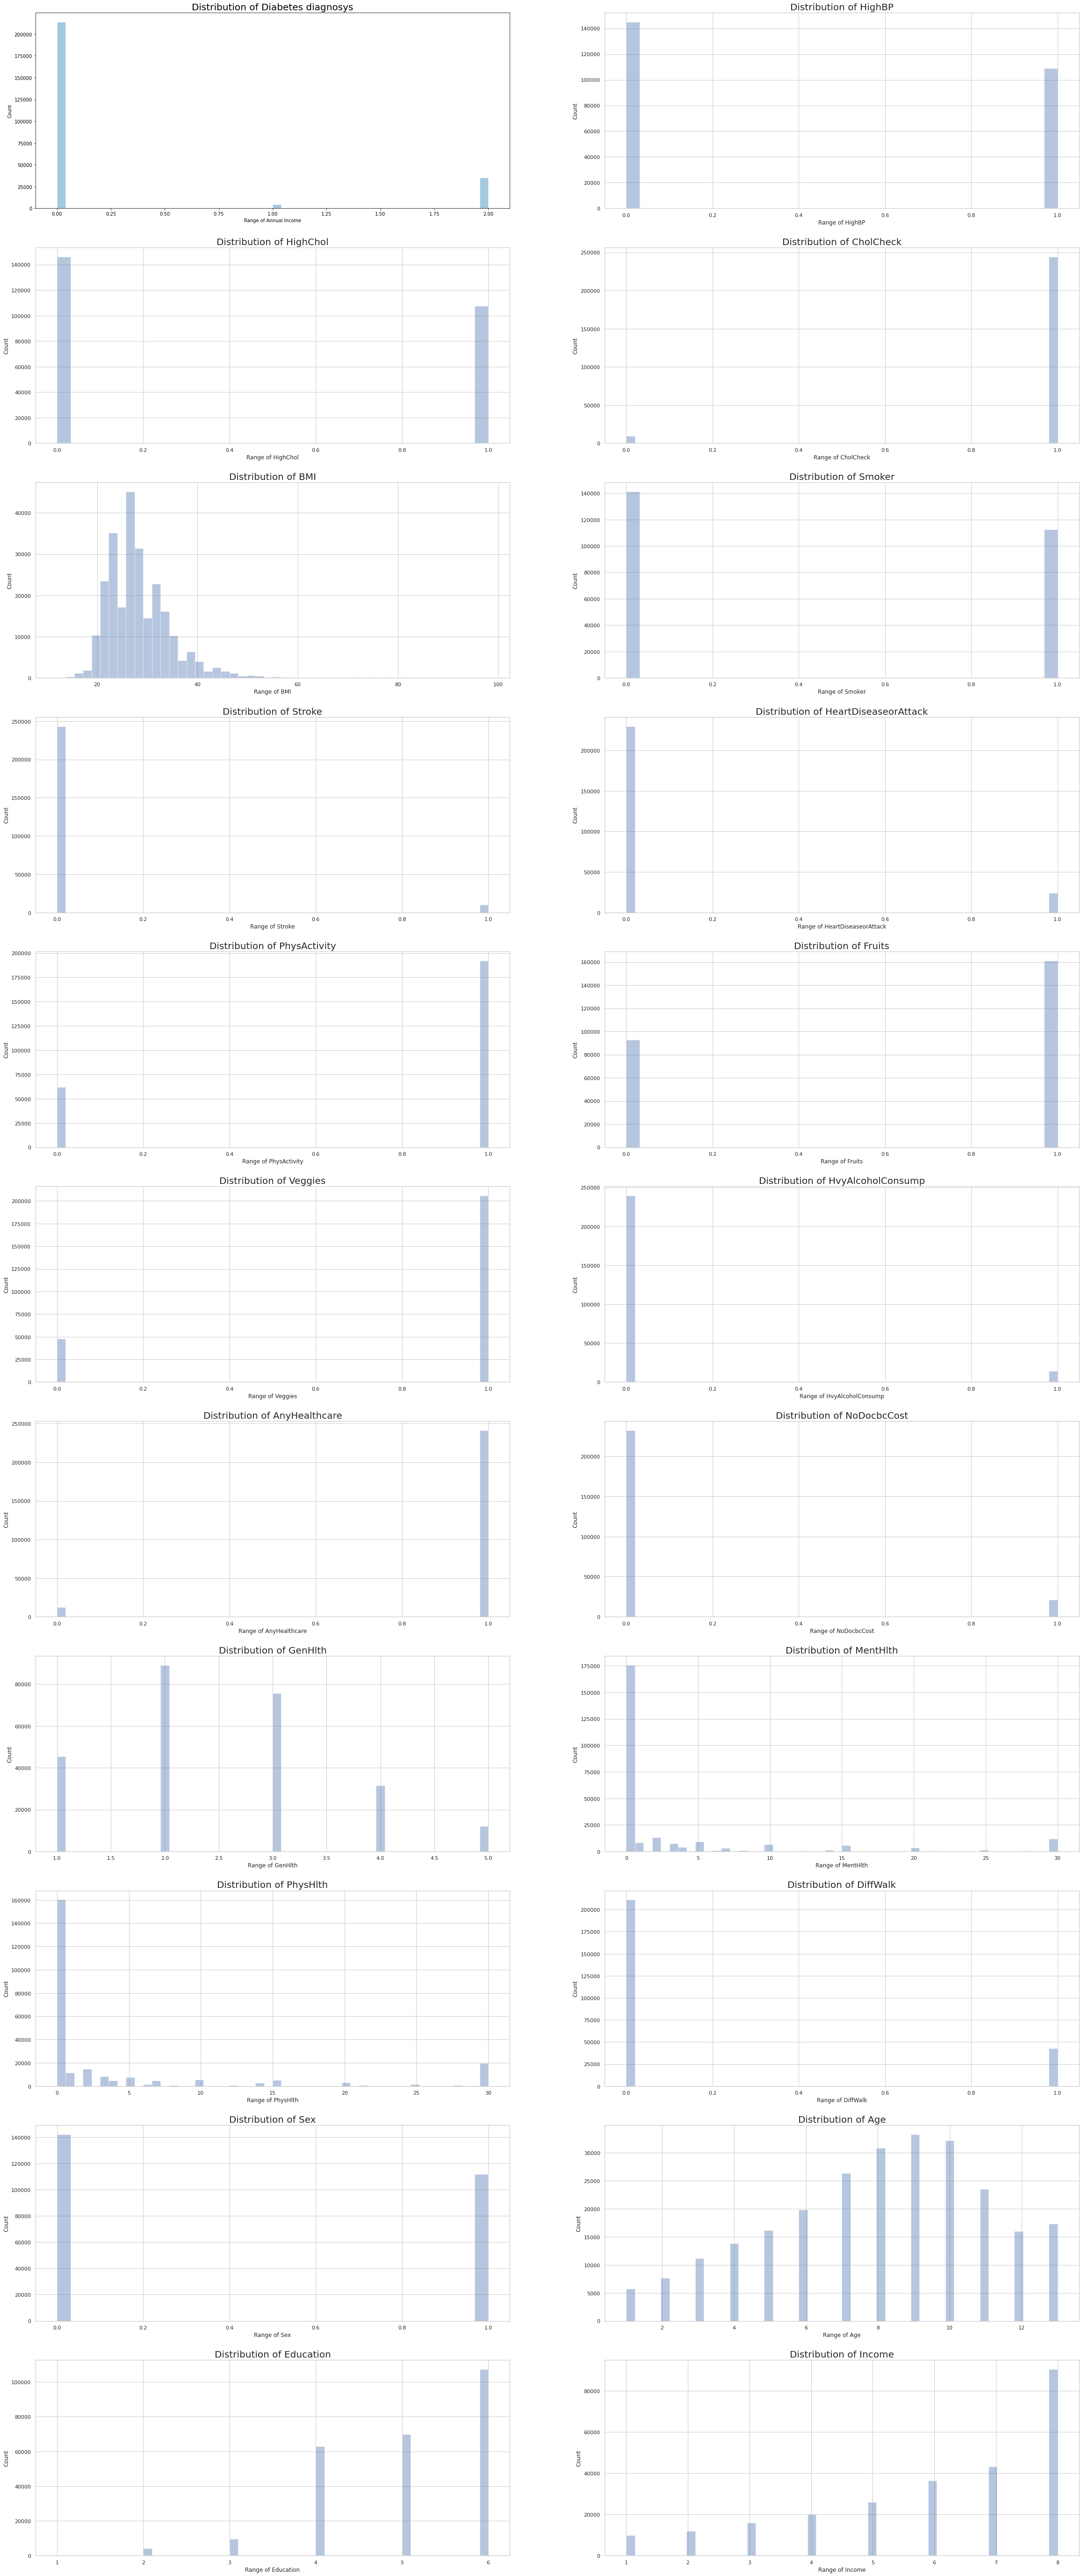

In [5]:
# Diabetes_012
plt.figure(figsize=(40,100))
plt.subplot(11, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Diabetes_012'], kde=False)
plt.title('Distribution of Diabetes diagnosys', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(11, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['HighBP'],  kde=False)
plt.title('Distribution of HighBP', fontsize = 20)
plt.xlabel('Range of HighBP')
plt.ylabel('Count')

plt.subplot(11, 2, 3)
sns.set(style = 'whitegrid')
sns.distplot(data['HighChol'],  kde=False)
plt.title('Distribution of HighChol', fontsize = 20)
plt.xlabel('Range of HighChol')
plt.ylabel('Count')

plt.subplot(11, 2, 4)
sns.set(style = 'whitegrid')
sns.distplot(data['CholCheck'],  kde=False)
plt.title('Distribution of CholCheck', fontsize = 20)
plt.xlabel('Range of CholCheck')
plt.ylabel('Count')

plt.subplot(11, 2, 5)
sns.set(style = 'whitegrid')
sns.distplot(data['BMI'],  kde=False)
plt.title('Distribution of BMI', fontsize = 20)
plt.xlabel('Range of BMI')
plt.ylabel('Count')

plt.subplot(11, 2, 6)
sns.set(style = 'whitegrid')
sns.distplot(data['Smoker'],  kde=False)
plt.title('Distribution of Smoker', fontsize = 20)
plt.xlabel('Range of Smoker')
plt.ylabel('Count')

plt.subplot(11, 2, 7)
sns.set(style = 'whitegrid')
sns.distplot(data['Stroke'],  kde=False)
plt.title('Distribution of Stroke', fontsize = 20)
plt.xlabel('Range of Stroke')
plt.ylabel('Count')

plt.subplot(11, 2, 8)
sns.set(style = 'whitegrid')
sns.distplot(data['HeartDiseaseorAttack'],  kde=False)
plt.title('Distribution of HeartDiseaseorAttack', fontsize = 20)
plt.xlabel('Range of HeartDiseaseorAttack')
plt.ylabel('Count')

plt.subplot(11, 2, 9)
sns.set(style = 'whitegrid')
sns.distplot(data['PhysActivity'],  kde=False)
plt.title('Distribution of PhysActivity', fontsize = 20)
plt.xlabel('Range of PhysActivity')
plt.ylabel('Count')

plt.subplot(11, 2, 10)
sns.set(style = 'whitegrid')
sns.distplot(data['Fruits'],  kde=False)
plt.title('Distribution of Fruits', fontsize = 20)
plt.xlabel('Range of Fruits')
plt.ylabel('Count')

plt.subplot(11, 2,11)
sns.set(style = 'whitegrid')
sns.distplot(data['Veggies'],  kde=False)
plt.title('Distribution of Veggies', fontsize = 20)
plt.xlabel('Range of Veggies')
plt.ylabel('Count')

plt.subplot(11, 2, 12)
sns.set(style = 'whitegrid')
sns.distplot(data['HvyAlcoholConsump'],  kde=False)
plt.title('Distribution of HvyAlcoholConsump', fontsize = 20)
plt.xlabel('Range of HvyAlcoholConsump')
plt.ylabel('Count')

plt.subplot(11, 2, 13)
sns.set(style = 'whitegrid')
sns.distplot(data['AnyHealthcare'],  kde=False)
plt.title('Distribution of AnyHealthcare', fontsize = 20)
plt.xlabel('Range of AnyHealthcare')
plt.ylabel('Count')

plt.subplot(11, 2, 14)
sns.set(style = 'whitegrid')
sns.distplot(data['NoDocbcCost'],  kde=False)
plt.title('Distribution of NoDocbcCost', fontsize = 20)
plt.xlabel('Range of NoDocbcCost')
plt.ylabel('Count')

plt.subplot(11, 2, 15)
sns.set(style = 'whitegrid')
sns.distplot(data['GenHlth'],  kde=False)
plt.title('Distribution of GenHlth', fontsize = 20)
plt.xlabel('Range of GenHlth')
plt.ylabel('Count')

plt.subplot(11, 2, 16)
sns.set(style = 'whitegrid')
sns.distplot(data['MentHlth'],  kde=False)
plt.title('Distribution of MentHlth', fontsize = 20)
plt.xlabel('Range of MentHlth')
plt.ylabel('Count')

plt.subplot(11, 2, 17)
sns.set(style = 'whitegrid')
sns.distplot(data['PhysHlth'],  kde=False)
plt.title('Distribution of PhysHlth', fontsize = 20)
plt.xlabel('Range of PhysHlth')
plt.ylabel('Count')

plt.subplot(11, 2, 18)
sns.set(style = 'whitegrid')
sns.distplot(data['DiffWalk'],  kde=False)
plt.title('Distribution of DiffWalk', fontsize = 20)
plt.xlabel('Range of DiffWalk')
plt.ylabel('Count')

plt.subplot(11, 2, 19)
sns.set(style = 'whitegrid')
sns.distplot(data['Sex'],  kde=False)
plt.title('Distribution of Sex', fontsize = 20)
plt.xlabel('Range of Sex')
plt.ylabel('Count')

plt.subplot(11, 2, 20)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'],  kde=False)
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.subplot(11, 2, 21)
sns.set(style = 'whitegrid')
sns.distplot(data['Education'],  kde=False)
plt.title('Distribution of Education', fontsize = 20)
plt.xlabel('Range of Education')
plt.ylabel('Count')

plt.subplot(11, 2, 22)
sns.set(style = 'whitegrid')
sns.distplot(data['Income'],  kde=False)
plt.title('Distribution of Income', fontsize = 20)
plt.xlabel('Range of Income')
plt.ylabel('Count')
plt.show()

In [6]:
print(data['Diabetes_012'].value_counts())
print("\n")
print(data['Age'].value_counts())
print("\n")
print(data['Income'].value_counts())

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64


9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64


8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64


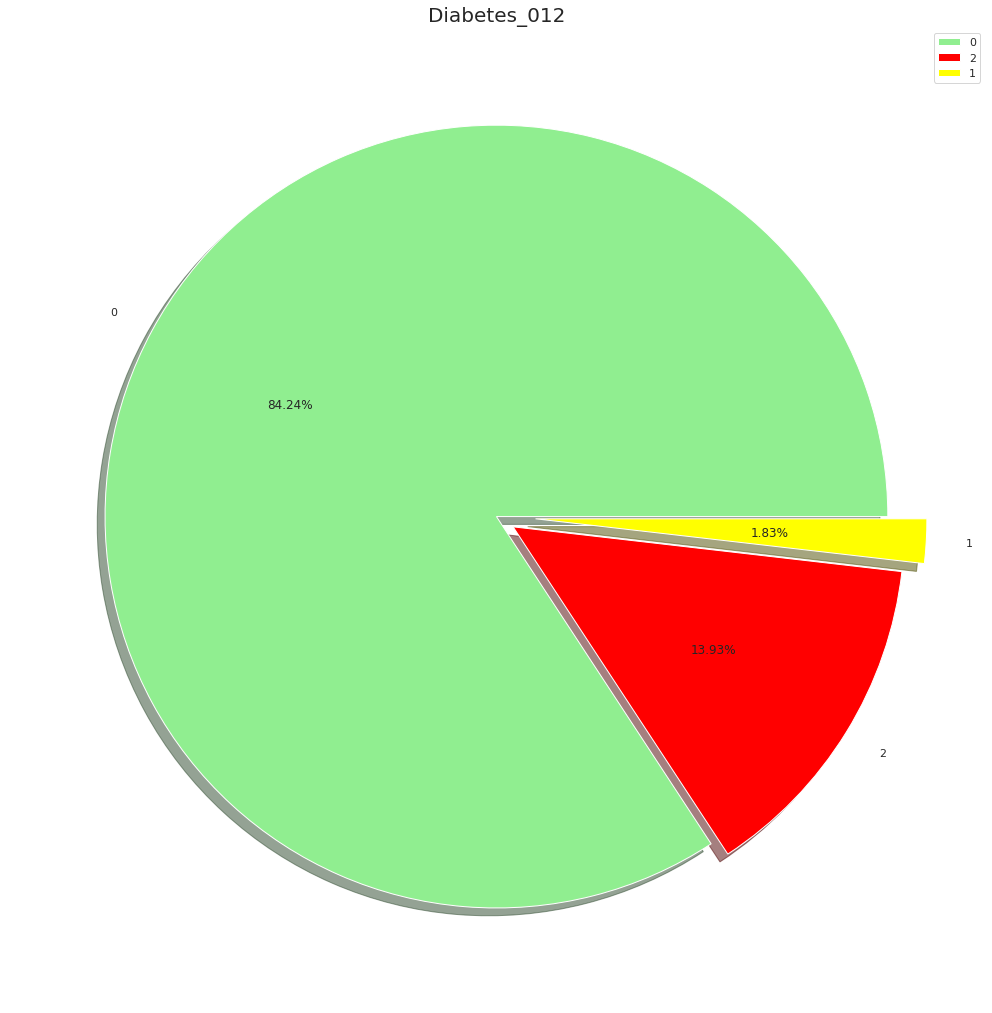

In [7]:
labels = ['0', '2', '1']
size = data['Diabetes_012'].value_counts()
colors = ['lightgreen', 'red', 'yellow']
explode = [0, 0.05, 0.1]

plt.figure(figsize=(18,18))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Diabetes_012', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#### Diagnosi di diabete

##### Estrazione del subset delle persone con diagnosi di diabete e analisi descrittiva

In [8]:
diabetes = data[data['Diabetes_012']==2]
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0


##### Analisi per sesso

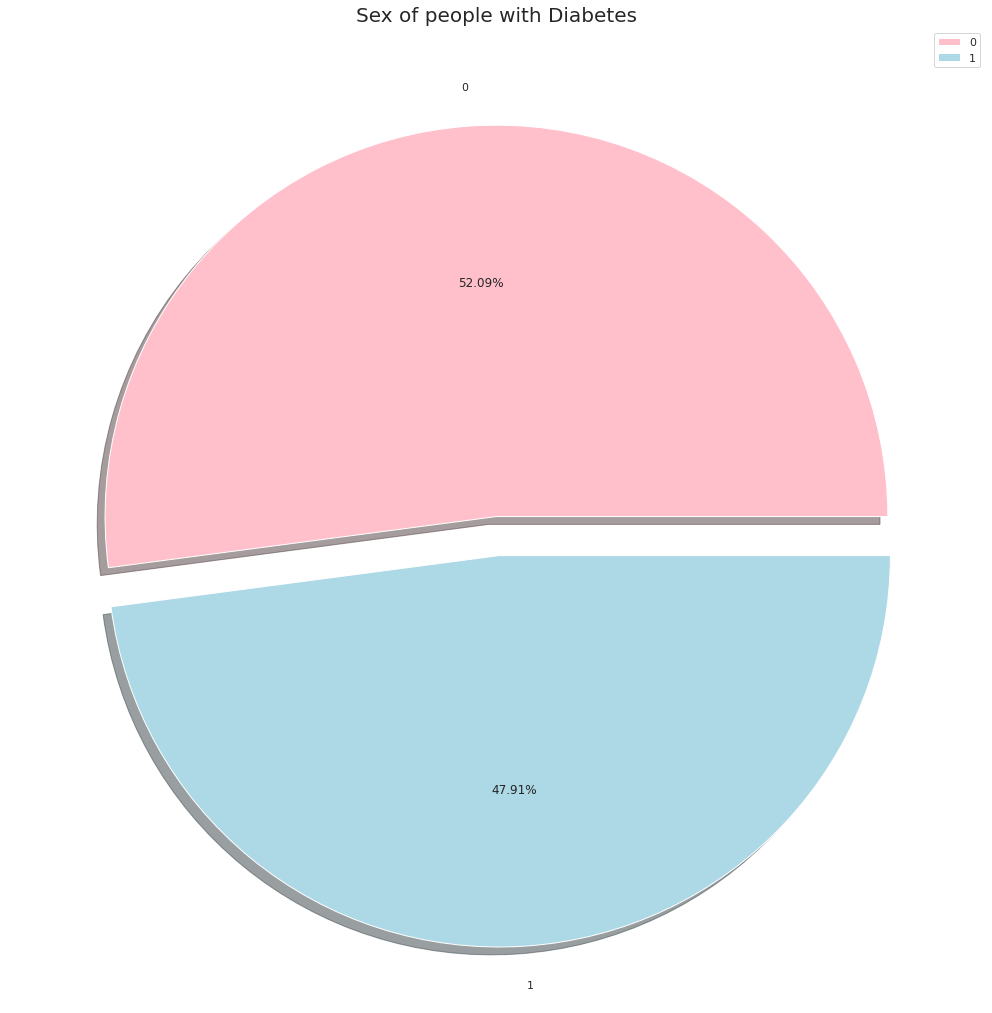

In [9]:
labels = ['0', '1']
size = diabetes['Sex'].value_counts()
colors = ['pink', 'lightblue']
explode = [0, 0.1]

plt.figure(figsize=(18,18))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Sex of people with Diabetes', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

##### Analisi per età

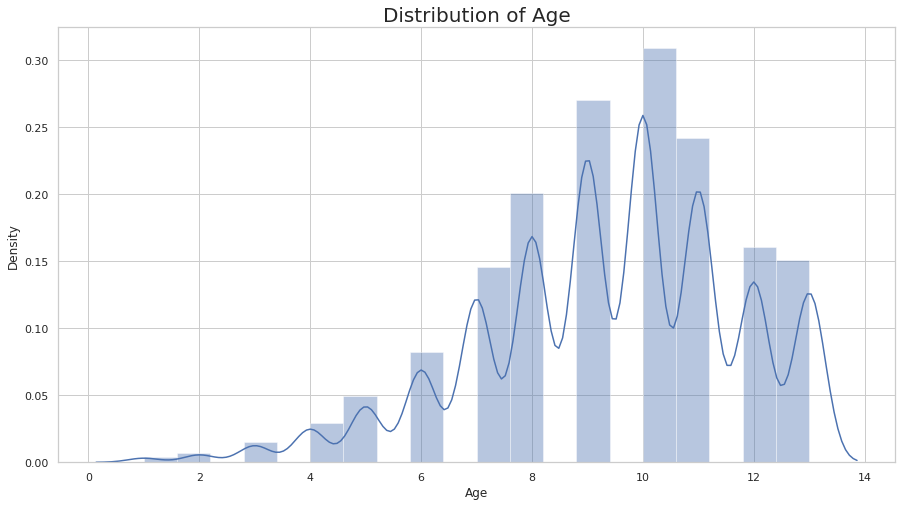

In [10]:
plt.figure(figsize=(15,8))
sns.distplot(diabetes['Age'], kde=True, bins=20)
plt.title('Distribution of Age', fontsize = 20)
plt.show()

Concentrazione di età tra i 50 e i 70.

##### Analisi per reddito

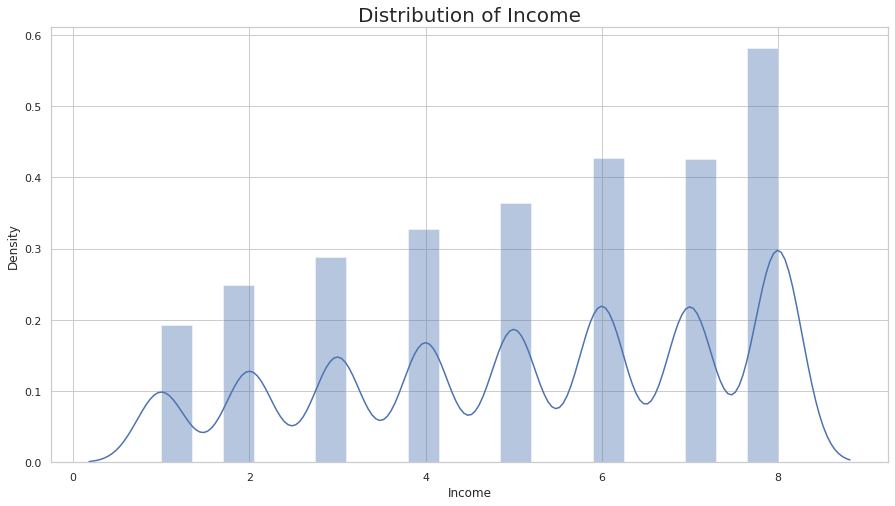

In [11]:
plt.figure(figsize=(15,8))
sns.distplot(diabetes['Income'], kde=True, bins=20)
plt.title('Distribution of Income', fontsize = 20)
plt.show()

Più alti valori di reddito corrispondono a maggior probabilità di diagnosi di diabete.

##### Analisi per indicatore di salute mentale

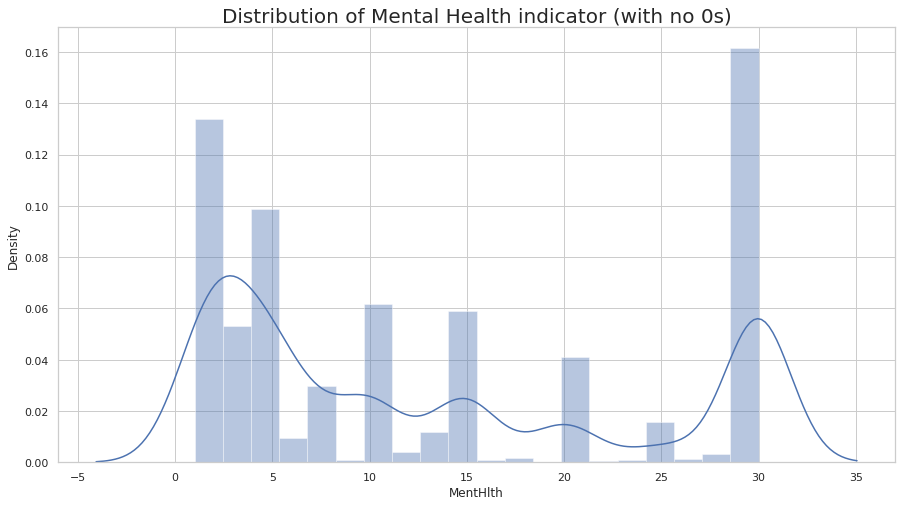

In [12]:
mental_health_no0 = diabetes[diabetes['MentHlth'] > 0]

plt.figure(figsize=(15,8))
sns.distplot(mental_health_no0['MentHlth'], kde=True, bins=20)
plt.title('Distribution of Mental Health indicator (with no 0s)', fontsize = 20)
plt.show()

Per chi soffre di salute mentale con diagnosi di diabete, si tende ad avere meno di 10 giorni negativi al mese o l'intera totalità.

##### Pairplot

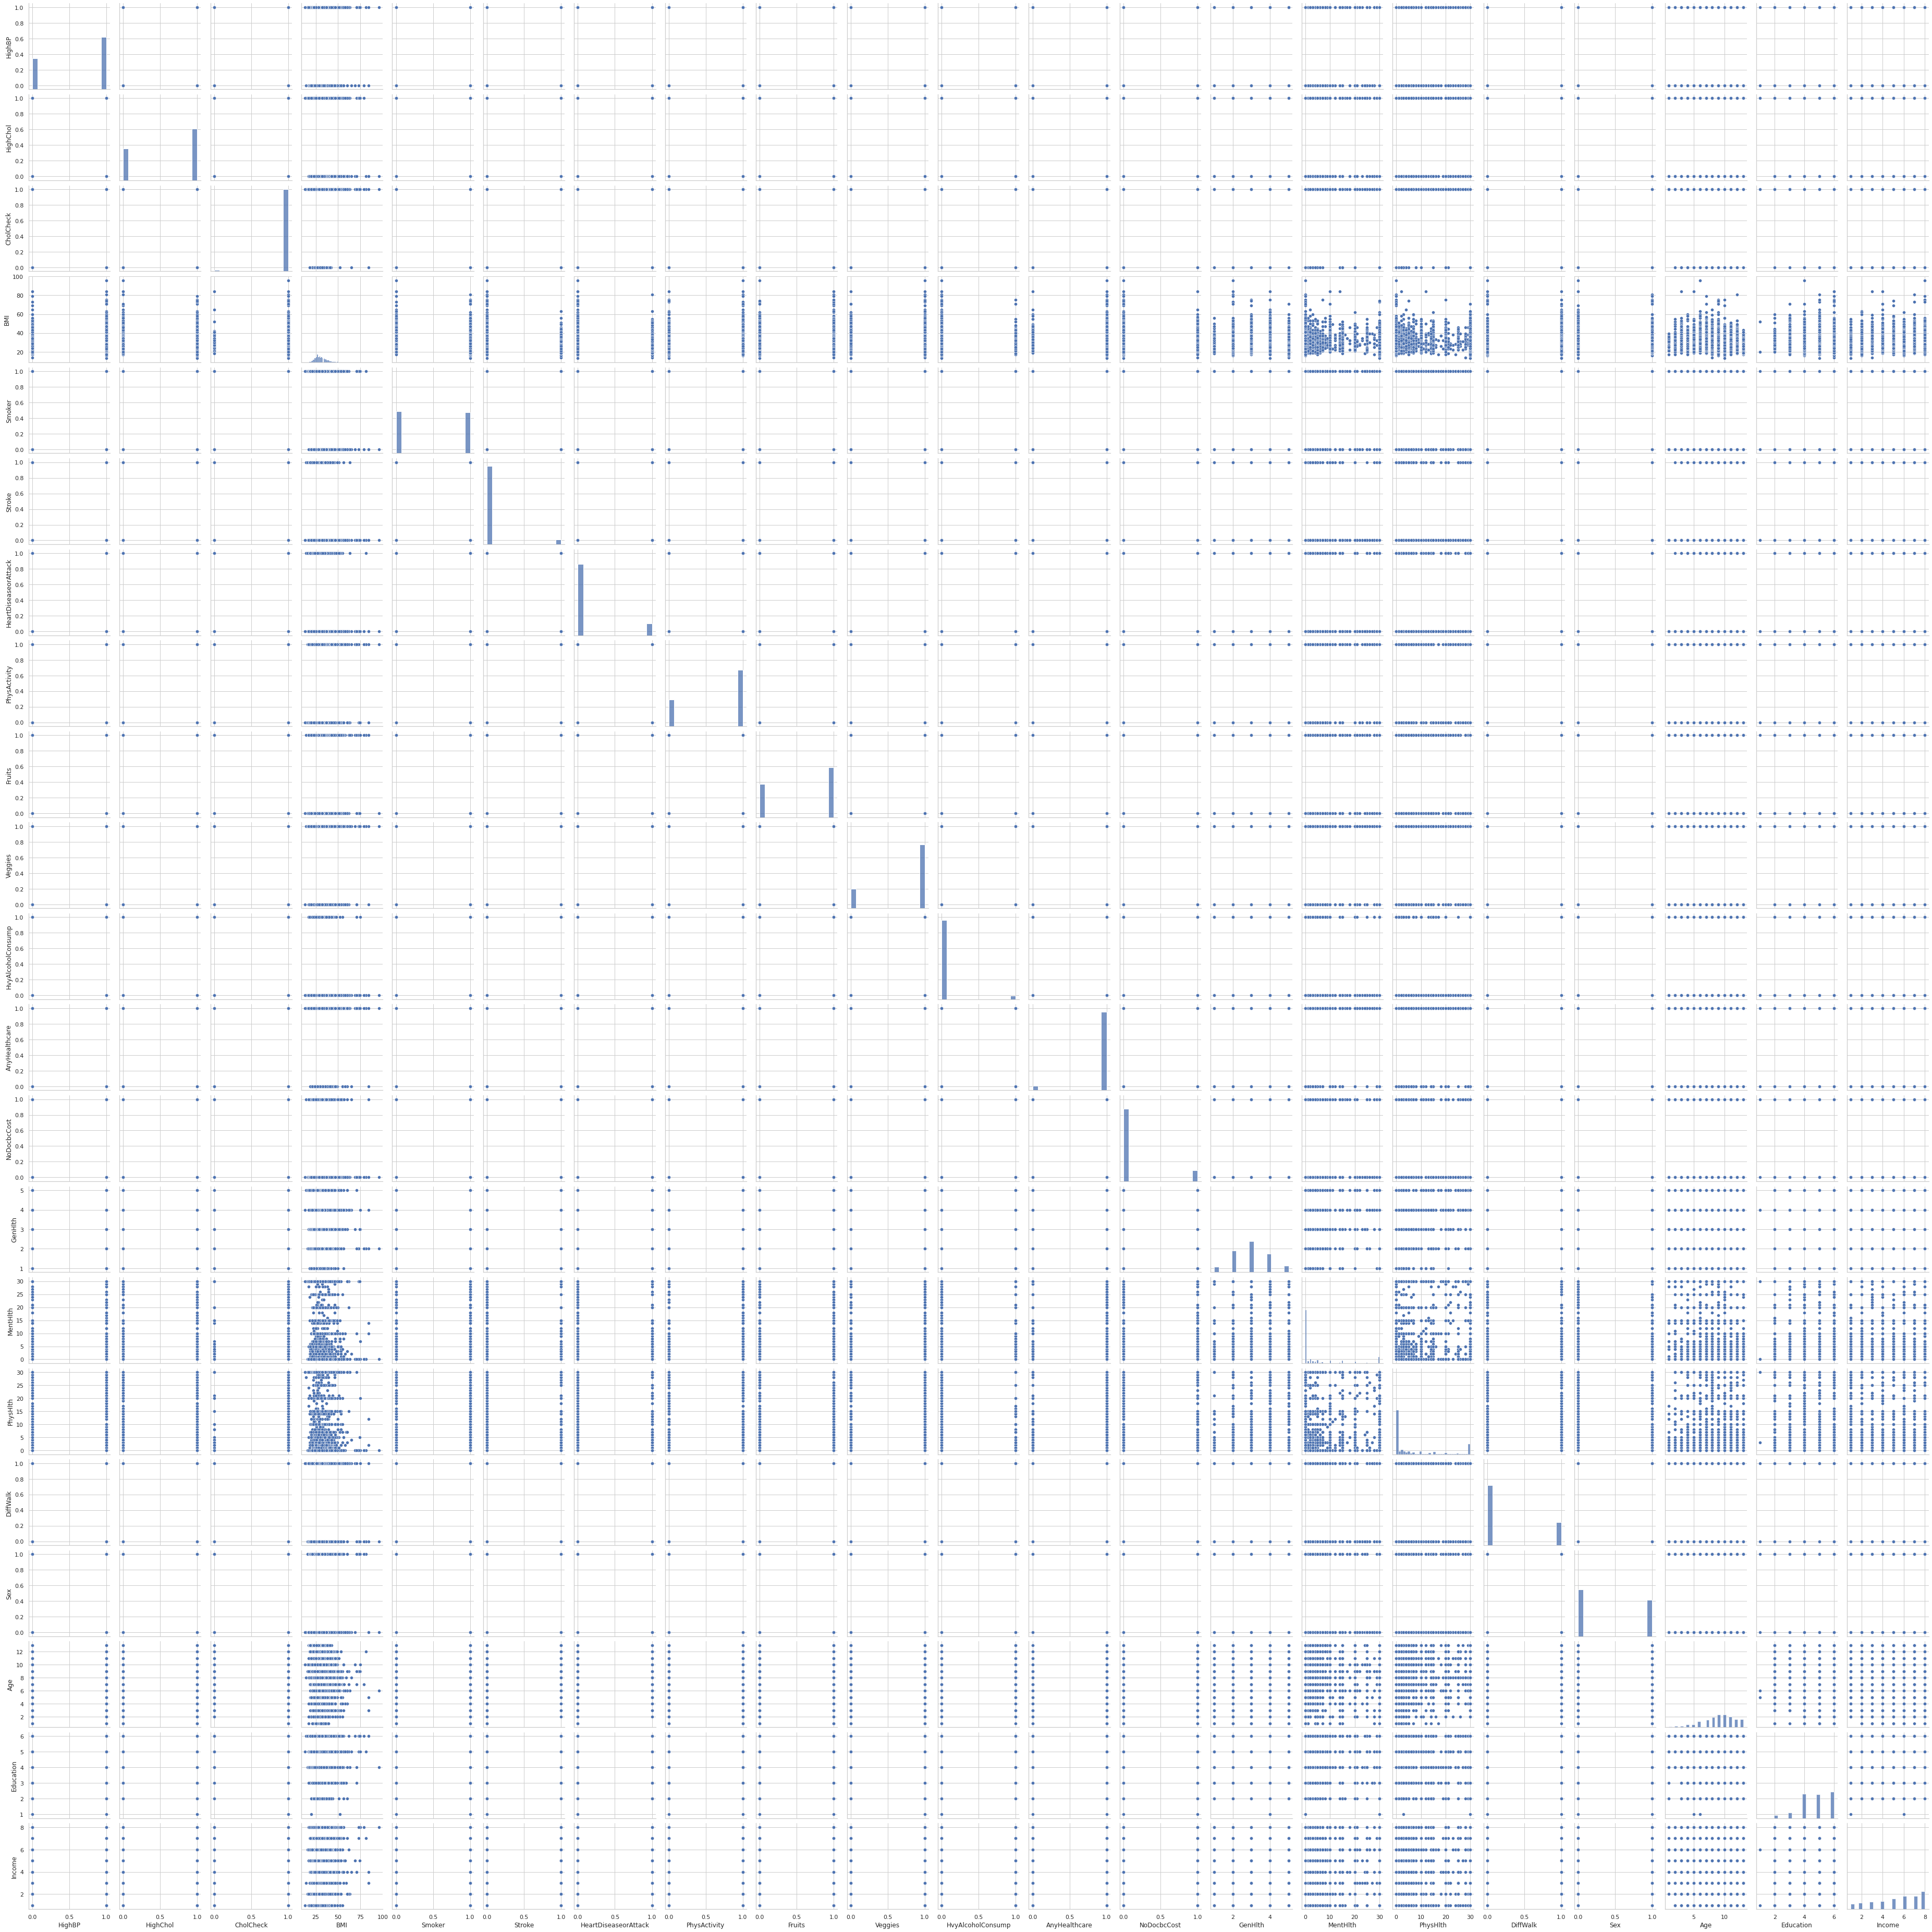

In [13]:
sns.pairplot(diabetes.drop(['Diabetes_012'], axis=1))

TODO: approfondire

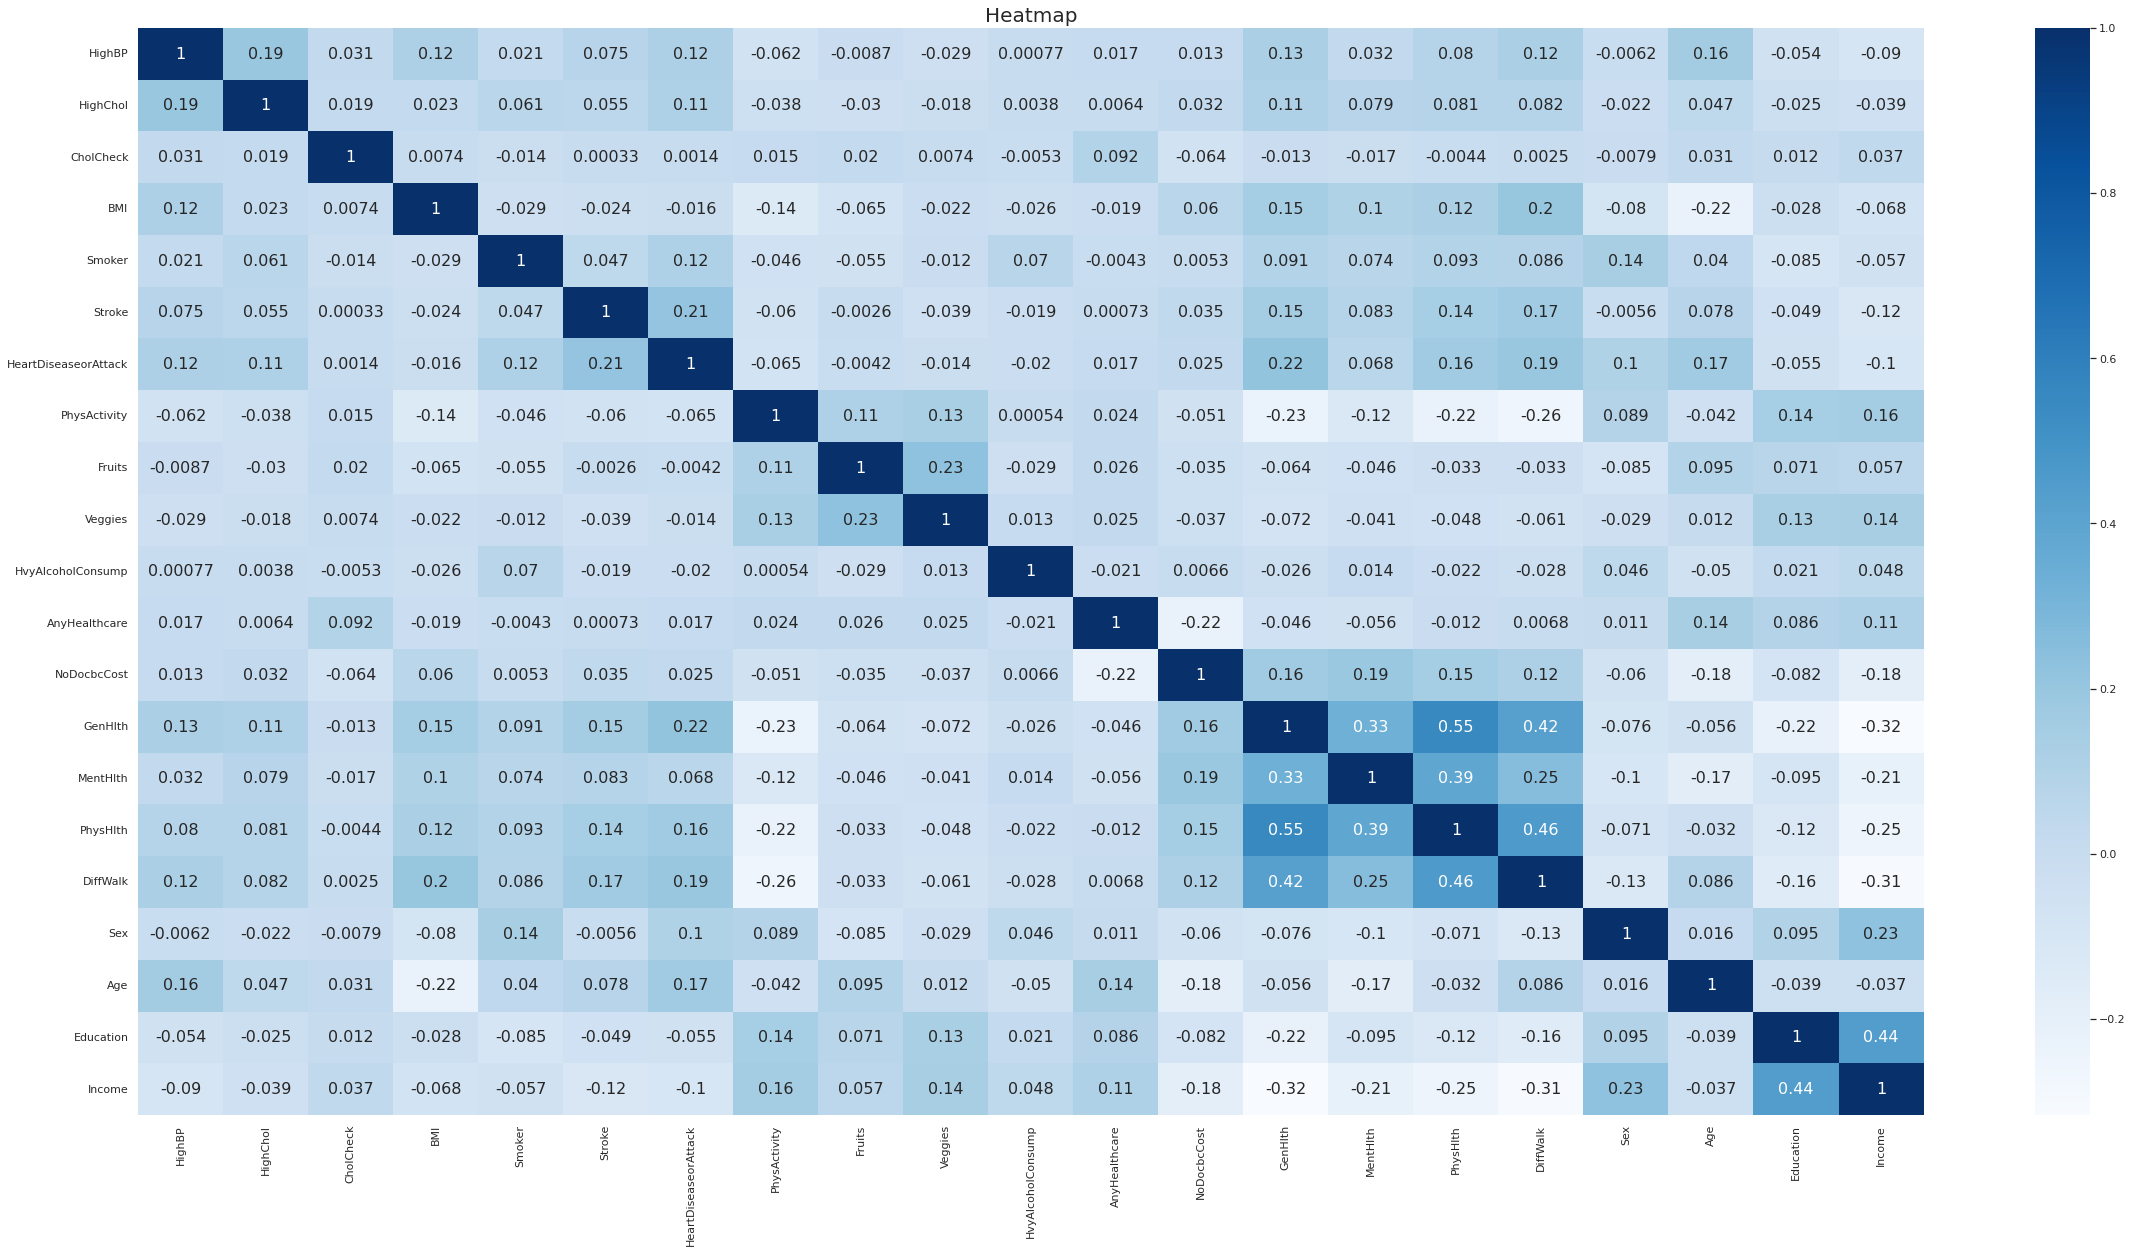

In [13]:
plt.figure(figsize=(40,20))
sns.heatmap(diabetes.drop(["Diabetes_012"], axis=1).corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap', fontsize = 20)
plt.show()

Maggiore correlazione tra i vari indicatori di salute: chi ha buona salute fisica tende ad avere buona salute mentale e a non avere difficoltà motorie.

### Clustering

#### Data Gathering

In [30]:
zeros = data[data['Diabetes_012']==0]
ones = data[data['Diabetes_012']==1]
twos = data[data['Diabetes_012']==2]

balanced_data = pd.concat([ones, zeros.sample(len(ones)), twos.sample(len(ones))])
print(ones.shape)

(4631, 22)


##### BMI and Physical Health

In [16]:
x = balanced_data.loc[:,['BMI', 'PhysHlth']].values
y = balanced_data.loc[:, 'Diabetes_012'].values

##### Kmeans Algorithm

Text(0, 0.5, 'wcss')

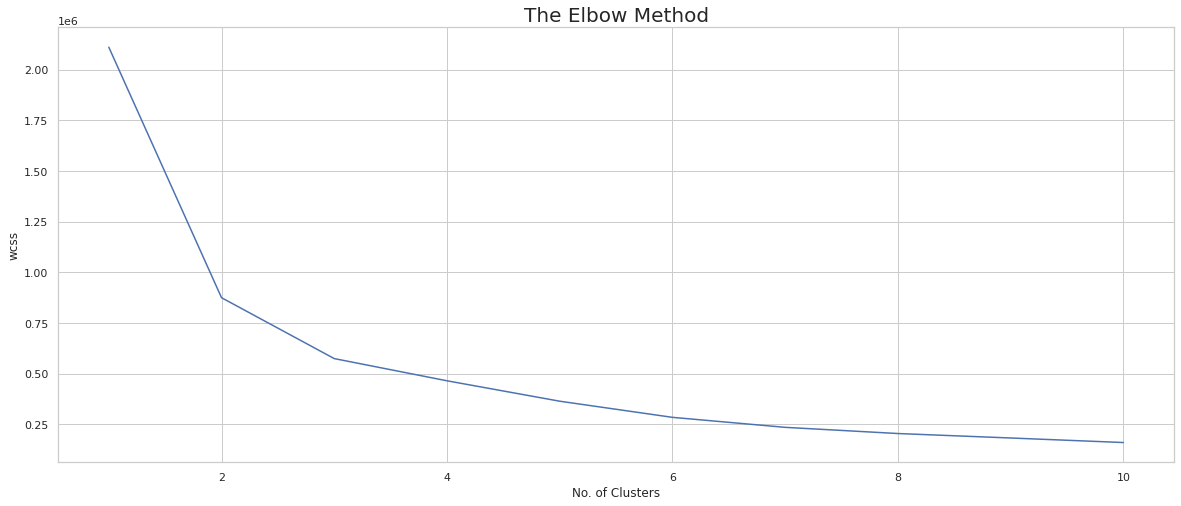

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

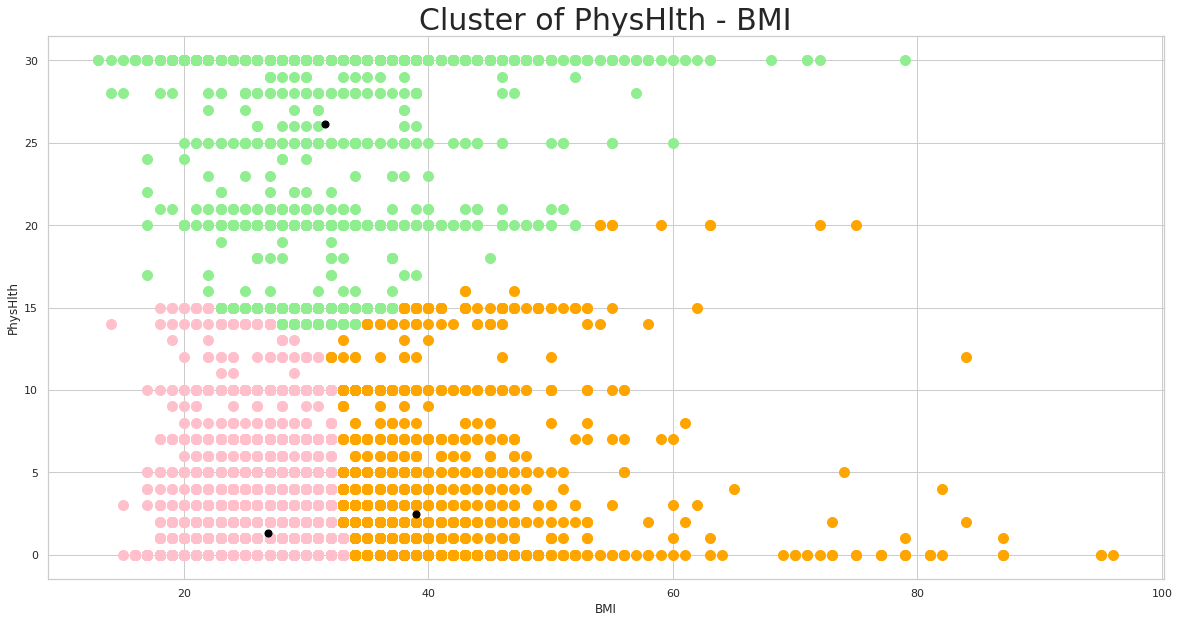

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(20,10))
plt.title('Cluster of PhysHlth - BMI', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('BMI')
plt.ylabel('PhysHlth')
plt.show()

Individuati tre cluster: l'arancione è dato da chi ha indice BMI rilevante ma soprattutto ha condizioni fisiche non eccellenti per più di 15 giorni al mese. Il rosa BMI alto, il verde basso BMI e condizioni fisiche buone.

Accuracy: 0.41


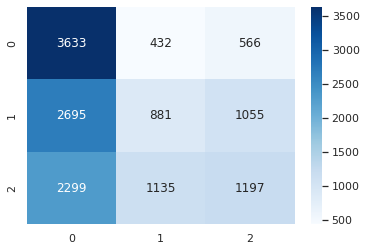

In [19]:
ypred = [2 if x == 1 else 0 if x==0 else 1 for x in ymeans]

cnfm = confusion_matrix(y, ypred)
sns.heatmap(cnfm, annot=True, fmt="d", cmap="Blues")

acc = round(accuracy_score(y, ypred), 2) #need to maximize
print(f'Accuracy: {acc}')

Quindi il clustering per BMI e attività fisica indica che con una vita sana e attiva si ha maggiore probabilità di non contrarre o possedere sintomi di diabete, essendo la precisione > 0.33 (la probabilità di scelta aleatoria di 3 classi). Questa osservazione sebbene comunque sia chiaro che in questo caso non si sta facendo classificazione e che quindi cluster e classi non hanno motivo di corrispondere.

##### Cluster All

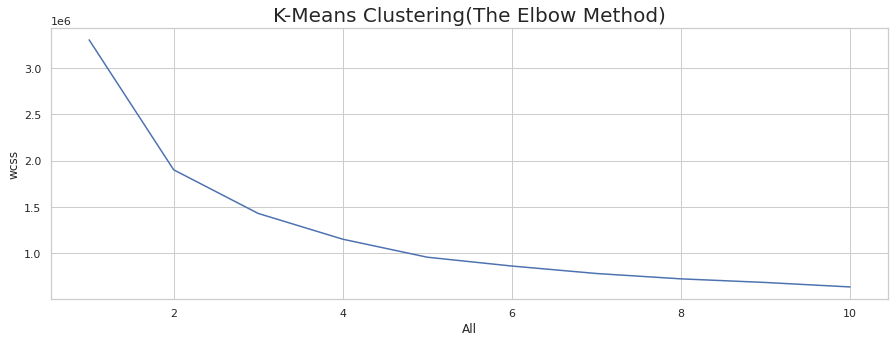

In [20]:
x = balanced_data.drop(["Diabetes_012"], axis=1).values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('All')
plt.ylabel('wcss')
plt.show()

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="auto").fit(x)
pca_x = pca.transform(x)

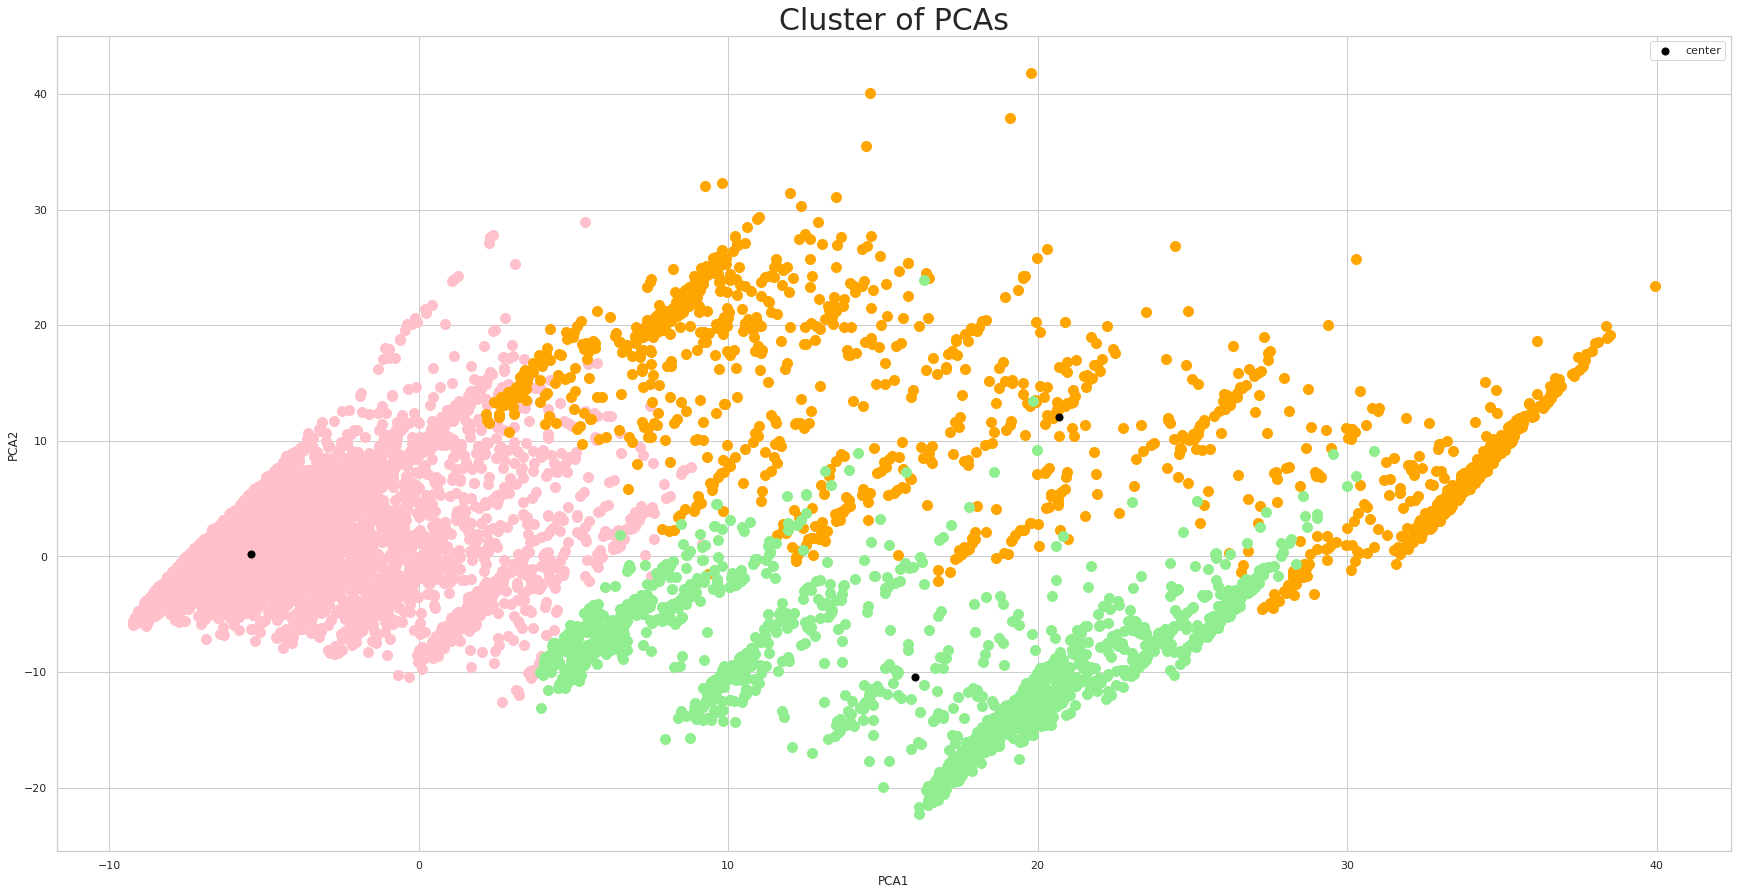

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(30,15))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

Accuracy: 0.39


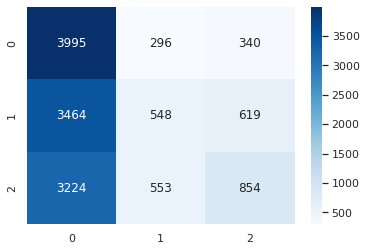

In [23]:
ypred = ymeans

cnfm = confusion_matrix(y, ypred)
sns.heatmap(cnfm, annot=True, fmt="d", cmap="Blues")

acc = round(accuracy_score(y, ypred), 2) #need to maximize
print(f'Accuracy: {acc}')

Allo stesso modo di sopra, la PCA riporta come la generazione di cluster senza nessun tipo di finetuning sui confini di questi possa suggerire la presenza di diabete con probabilità maggiore rispetto a quella aleatoria. Questa osservazione sebbene comunque sia chiaro che in questo caso non si sta facendo classificazione e che quindi cluster e classi non hanno motivo di corrispondere.

#### DBSCAN

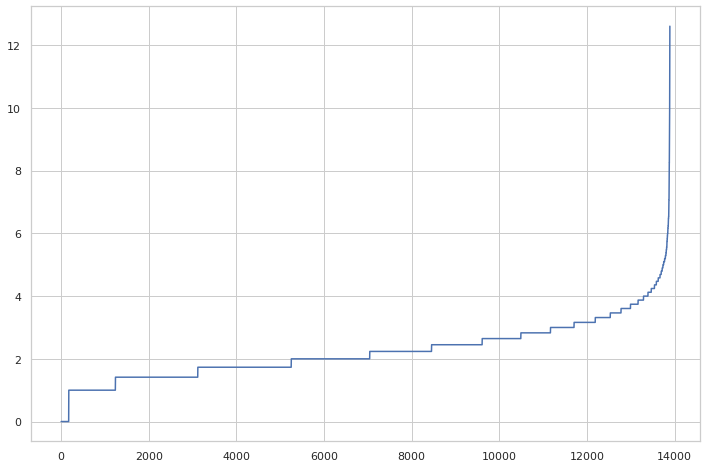

In [24]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=2, n_jobs=-1, algorithm='ball_tree', leaf_size=5)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [34]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=4, min_samples=5, algorithm="ball_tree", n_jobs=-1).fit(x) #Scegli distanza
ymeans = db.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


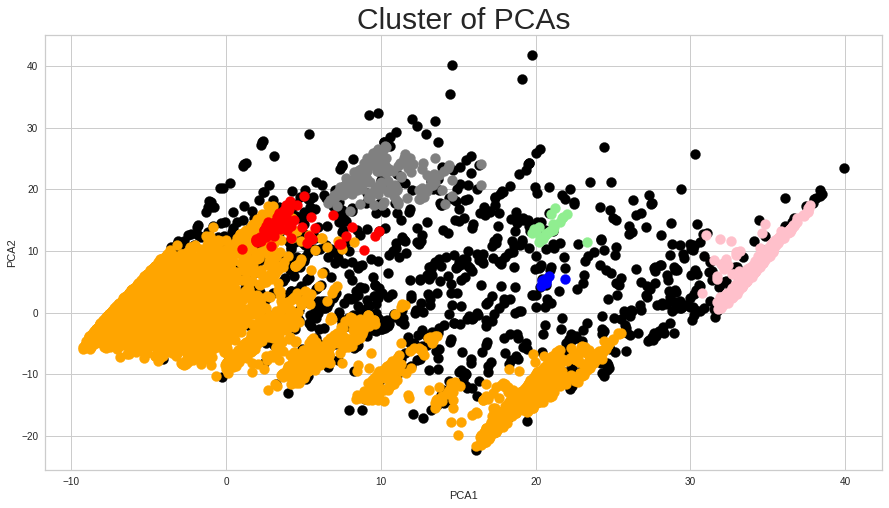

In [35]:
plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == -1, 0], pca_x[ymeans == -1, 1], s = 100, c = 'black')
plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

#### Yellowbrick

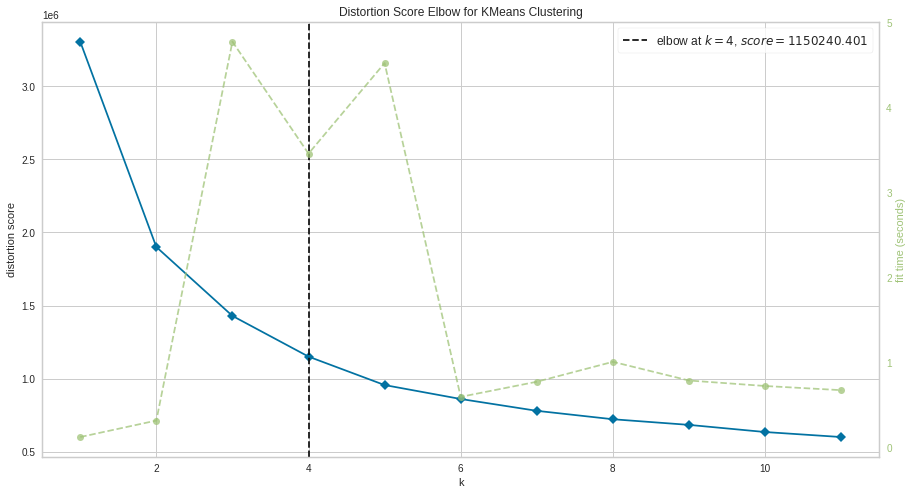

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### Silhouette

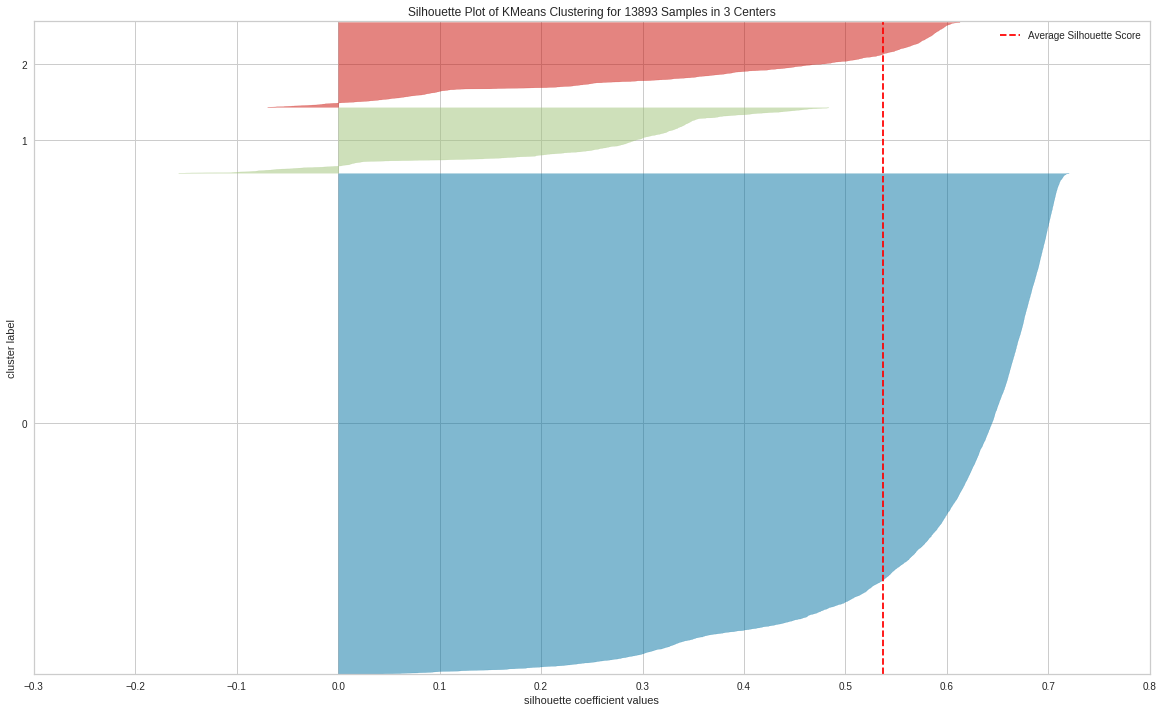

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 13893 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(20,12))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure